In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Credit.csv")

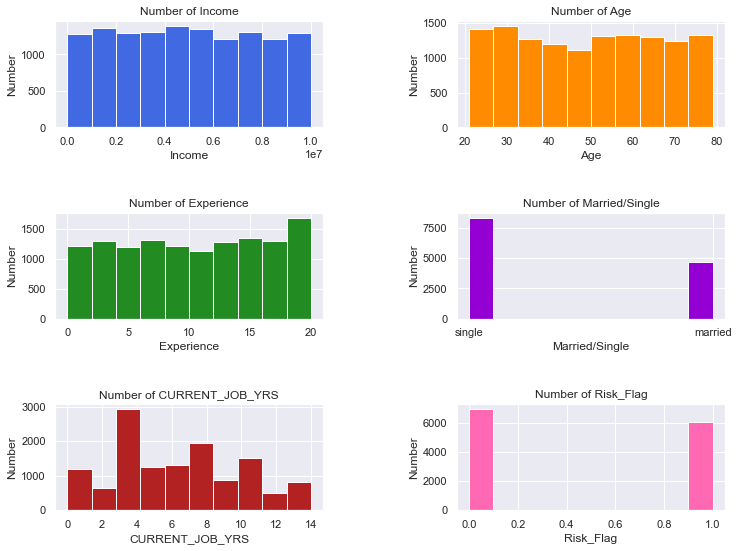

In [33]:
header = list(df)
header.pop(0)

color_list= ['royalblue','darkorange','forestgreen','darkviolet','firebrick','hotpink']

fig = plt.figure(figsize=(12, 9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.8) # 調整子圖間距
count = 1

for title, color in zip(header, color_list):
    
    ax = fig.add_subplot(3, 2, count)
    ax.hist(df[title],bins=10, color=color) # bins 控制幾個直方
    ax.set_xlabel(title)
    ax.set_ylabel("Number")
    ax.set_title("Number of " + title)
    count = count + 1
    
plt.show()

In [34]:
# Use SVM to identify possible defaulters, please report confusion matrix and accuracy

y = df['Risk_Flag']
# print(y)

In [35]:
X = df.drop(['Id'], axis=1)
X = X.drop(['Risk_Flag'], axis=1)

# turn str to 1 or 0, 1 for single 
def str2label(X):
    
    for index in range(len(X)):
        if(X['Married/Single'][index] == 'single'):
            X['Married/Single'][index] = 0
        else:
            X['Married/Single'][index] = 1
    
    return X

X = str2label(X)
# print(X)
# print(X['Married/Single'])
# Warning 為正常，這格需要一些時間

/var/folders/74/z3ymmwq52xgdcklmdrlgs7vc0000gp/T/ipykernel_18381/2239748329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married/Single'][index] = 0
/var/folders/74/z3ymmwq52xgdcklmdrlgs7vc0000gp/T/ipykernel_18381/2239748329.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married/Single'][index] = 1


In [36]:
# turn dataframe into numpy
X = X.values
y = y.values
# print(y)

In [37]:
from sklearn.model_selection import train_test_split

# Divide into train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150,whiten=True)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca, svc)

accuracy rate: 0.7948717948717948


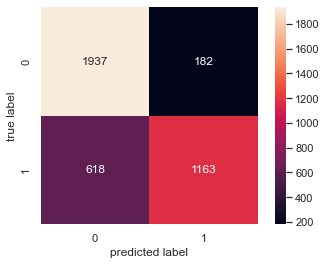

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import svm

# use seaborn plotting defaults
import seaborn as sns; sns.set()

model = svm.SVC(kernel='rbf', gamma=0.7, C=1)
model_trained = model.fit(X_train, y_train)

mat = confusion_matrix(model_trained.predict(X_test), y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('predicted label')
plt.ylabel('true label');

print('accuracy rate:', model_trained.score(X_test, y_test))